### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, 1024)]

In [4]:
data = pd.read_csv('../data/sacharose_1000/all.csv', sep = '\t').iloc[:,:-1]

In [5]:
data.columns = names

In [6]:
def load_spectrum(data, moment_of_time):
    ppm = data['ppm']
    intensity = data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [7]:
sp1 = load_spectrum(data, 1)
sp1023 = load_spectrum(data, 1023)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


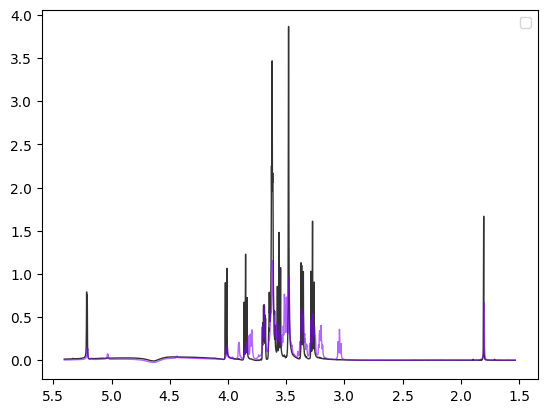

In [8]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([sp1, sp1023], profile=True)

### Estimation

In [9]:
kappa = 1
kappa_th = 0.75

In [10]:
proportions_in_times = []
noise_proportions_in_times = []

sp1 = load_spectrum(data, 1)
sp1.trim_negative_intensities()
sp1.normalize()

for i in range(1, 1024):
    print('This is timepoint '+str(i)+'.\n')
    mix = load_spectrum(data, i)
    estimation = estimate_proportions(mix, [sp1], what_to_compare='area', 
                                      solver=pulp.GUROBI(msg=False),
                                     MTD=kappa, MTD_th=kappa_th)
        
    proportions_in_times.append(estimation['proportions'])
    noise_proportions_in_times.append(estimation['proportion_of_noise_in_components'])
    
    print('Proportions:\n')
    print(estimation['proportions'])
    print('\n')
    print('Proportion_of_noise_in_components:\n')
    print(estimation['proportion_of_noise_in_components'])
    print('\n')

This is timepoint 1.

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-13
The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.


/home/basia/.local/lib/python3.10/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Proportions:

[1.0000000000000002]


Proportion_of_noise_in_components:

0.0


This is timepoint 2.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000027]


Proportion_of_noise_in_components:

0.0028175869820000073


This is timepoint 3.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9977355669069972]


Proportion_of_noise_in_components:

0.0014572711309999958


This is timepoint 4.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.998018700800006]


Proportion_of_noise_in_components:

0.0012804451770000076


This is timepoint 5.

The mixture's spectrum c

Proportions:

[0.999862812285995]


Proportion_of_noise_in_components:

0.00793738023499996


This is timepoint 31.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.999550122441002]


Proportion_of_noise_in_components:

0.0011245664900000022


This is timepoint 32.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9993375702150047]


Proportion_of_noise_in_components:

6.962847100000033e-05


This is timepoint 33.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9996412239410046]


Proportion_of_noise_in_components:

0.0007986239180000036


This is timepoint 34.

The m

Proportions:

[0.9999999999999917]


Proportion_of_noise_in_components:

0.007119049762999941


This is timepoint 60.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9986524078709957]


Proportion_of_noise_in_components:

0.001455018705999994


This is timepoint 61.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000016]


Proportion_of_noise_in_components:

0.0018541482490000028


This is timepoint 62.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9952622183940062]


Proportion_of_noise_in_components:

0.010636747437000067


This is timepoint 63.

The 

Proportions:

[1.0000000000000089]


Proportion_of_noise_in_components:

0.01561656217000014


This is timepoint 89.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999999999999972]


Proportion_of_noise_in_components:

0.0002864725229999992


This is timepoint 90.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9993393337309968]


Proportion_of_noise_in_components:

0.004766191237999985


This is timepoint 91.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9975297761529992]


Proportion_of_noise_in_components:

0.0055007635029999955


This is timepoint 92.

The 

Proportions:

[1.000000000000007]


Proportion_of_noise_in_components:

0.002512514087000018


This is timepoint 117.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9957635268200011]


Proportion_of_noise_in_components:

0.014657440148000016


This is timepoint 118.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000047]


Proportion_of_noise_in_components:

0.004114756264000019


This is timepoint 119.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9956402550880027]


Proportion_of_noise_in_components:

0.012317626726000033


This is timepoint 120.

Th

Proportions:

[0.9999999999999996]


Proportion_of_noise_in_components:

0.005019018794999997


This is timepoint 145.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9985553643520007]


Proportion_of_noise_in_components:

0.0014778455840000011


This is timepoint 146.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9997776253720071]


Proportion_of_noise_in_components:

0.01860432531300013


This is timepoint 147.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9974691550949929]


Proportion_of_noise_in_components:

0.006135846641999957


This is timepoint 148.

T

Proportions:

[0.9999999999999931]


Proportion_of_noise_in_components:

0.018590034194999872


This is timepoint 173.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000042]


Proportion_of_noise_in_components:

0.011138984306000048


This is timepoint 174.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000029]


Proportion_of_noise_in_components:

0.007752675610000022


This is timepoint 175.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9968263640079972]


Proportion_of_noise_in_components:

0.014787795652999959


This is timepoint 176.

T

Proportions:

[1.000000000000002]


Proportion_of_noise_in_components:

0.008029604396000015


This is timepoint 202.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9962116955719968]


Proportion_of_noise_in_components:

0.021204854464999933


This is timepoint 203.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9982250110050049]


Proportion_of_noise_in_components:

0.013125415053000064


This is timepoint 204.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9972683002059965]


Proportion_of_noise_in_components:

0.015980192214999946


This is timepoint 205.

Th

Proportions:

[1.0000000000000024]


Proportion_of_noise_in_components:

0.005167229997000013


This is timepoint 231.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000009]


Proportion_of_noise_in_components:

0.008931988010000008


This is timepoint 232.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9975541365739935]


Proportion_of_noise_in_components:

0.01939492362899987


This is timepoint 233.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9951873736189976]


Proportion_of_noise_in_components:

0.021285257333999948


This is timepoint 234.

Th

Proportions:

[0.9982892454999995]


Proportion_of_noise_in_components:

0.017755457379999992


This is timepoint 260.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9971449376130074]


Proportion_of_noise_in_components:

0.02017417086700015


This is timepoint 261.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9978112911759963]


Proportion_of_noise_in_components:

0.023286033537999913


This is timepoint 262.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000047]


Proportion_of_noise_in_components:

0.010166218913000047


This is timepoint 263.

Th

Proportions:

[0.9977476468840006]


Proportion_of_noise_in_components:

0.020819564455000016


This is timepoint 289.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000058]


Proportion_of_noise_in_components:

0.016491986715000094


This is timepoint 290.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9977068706169959]


Proportion_of_noise_in_components:

0.018112718703999928


This is timepoint 291.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9948468247399994]


Proportion_of_noise_in_components:

0.03427198653699998


This is timepoint 292.

Th

Proportions:

[0.9962463617560005]


Proportion_of_noise_in_components:

0.028256573827000014


This is timepoint 318.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9959982576040004]


Proportion_of_noise_in_components:

0.04216983079500002


This is timepoint 319.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9961794418049981]


Proportion_of_noise_in_components:

0.030086006899999945


This is timepoint 320.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999999999999933]


Proportion_of_noise_in_components:

0.017672348531999883


This is timepoint 321.

Th

Proportions:

[0.9976365199079946]


Proportion_of_noise_in_components:

0.025379291815999863


This is timepoint 347.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9977099520049948]


Proportion_of_noise_in_components:

0.036018546857999816


This is timepoint 348.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9987046117540018]


Proportion_of_noise_in_components:

0.018772168881000036


This is timepoint 349.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999999999999908]


Proportion_of_noise_in_components:

0.025070245277999767


This is timepoint 350.

T

Proportions:

[0.9974321584650067]


Proportion_of_noise_in_components:

0.025938244398000174


This is timepoint 375.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9957206289639976]


Proportion_of_noise_in_components:

0.03196077811999992


This is timepoint 376.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.995537489453995]


Proportion_of_noise_in_components:

0.02879592741799986


This is timepoint 377.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9988958702109958]


Proportion_of_noise_in_components:

0.022887539055999905


This is timepoint 378.

The 

Proportions:

[0.9991444612779978]


Proportion_of_noise_in_components:

0.04204059092699991


This is timepoint 404.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000047]


Proportion_of_noise_in_components:

0.03364159647900016


This is timepoint 405.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9984230798339995]


Proportion_of_noise_in_components:

0.027123432190999986


This is timepoint 406.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999999999999951]


Proportion_of_noise_in_components:

0.025890526374999875


This is timepoint 407.

The

Proportions:

[0.9991633914360017]


Proportion_of_noise_in_components:

0.0662171154340001


This is timepoint 433.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9995921859909942]


Proportion_of_noise_in_components:

0.056789813600999675


This is timepoint 434.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9988294657400002]


Proportion_of_noise_in_components:

0.04335800683100001


This is timepoint 435.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9995517548899983]


Proportion_of_noise_in_components:

0.04641965307799992


This is timepoint 436.

The m

Proportions:

[0.9978839546940005]


Proportion_of_noise_in_components:

0.08843521638400004


This is timepoint 462.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.0000000000000027]


Proportion_of_noise_in_components:

0.038808896752000104


This is timepoint 463.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999999999999997]


Proportion_of_noise_in_components:

0.040031349734999985


This is timepoint 464.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.996090744749999]


Proportion_of_noise_in_components:

0.02913359227999997


This is timepoint 465.

The 

Proportions:

[0.9999996540430046]


Proportion_of_noise_in_components:

0.047710635350000224


This is timepoint 491.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9995459556409988]


Proportion_of_noise_in_components:

0.06118324737099992


This is timepoint 492.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9993079565939983]


Proportion_of_noise_in_components:

0.04819116395199992


This is timepoint 493.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9980388006109984]


Proportion_of_noise_in_components:

0.04283690221899993


This is timepoint 494.

The 

Proportions:

[0.9996423656219997]


Proportion_of_noise_in_components:

0.04535526216299999


This is timepoint 520.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.998548409887002]


Proportion_of_noise_in_components:

0.040457977396000086


This is timepoint 521.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999999999999971]


Proportion_of_noise_in_components:

0.010585372084999968


This is timepoint 522.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9962304484869967]


Proportion_of_noise_in_components:

0.04013302201399987


This is timepoint 523.

The 

Proportions:

[1.0000000000000016]


Proportion_of_noise_in_components:

0.03161318255000005


This is timepoint 549.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9984889123639966]


Proportion_of_noise_in_components:

0.0322868122359999


This is timepoint 550.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.997098414265998]


Proportion_of_noise_in_components:

0.03464503399699993


This is timepoint 551.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9954661509540065]


Proportion_of_noise_in_components:

0.043570916162000276


This is timepoint 552.

The mi

Proportions:

[0.997205908904002]


Proportion_of_noise_in_components:

0.0473327320820001


This is timepoint 578.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9947578481199989]


Proportion_of_noise_in_components:

0.04948637664599995


This is timepoint 579.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9987440830950066]


Proportion_of_noise_in_components:

0.03206617279700021


This is timepoint 580.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9955136120620138]


Proportion_of_noise_in_components:

0.04359437992100061


This is timepoint 581.

The mix

Proportions:

[0.9970016458059976]


Proportion_of_noise_in_components:

0.044558499220999886


This is timepoint 607.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999665348079989]


Proportion_of_noise_in_components:

0.052985653329999945


This is timepoint 608.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999999999999966]


Proportion_of_noise_in_components:

0.03581039747599987


This is timepoint 609.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9952500483640069]


Proportion_of_noise_in_components:

0.04937366416500034


This is timepoint 610.

The

Proportions:

[0.9993729338429993]


Proportion_of_noise_in_components:

0.04460463239699997


This is timepoint 636.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9987267363690029]


Proportion_of_noise_in_components:

0.04580107630500013


This is timepoint 637.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9963408789179983]


Proportion_of_noise_in_components:

0.05042348821399991


This is timepoint 638.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9960967633609988]


Proportion_of_noise_in_components:

0.04633525208799995


This is timepoint 639.

The m

Proportions:

[0.9928873002820002]


Proportion_of_noise_in_components:

0.048568654847000015


This is timepoint 665.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999999999999997]


Proportion_of_noise_in_components:

0.04049238291299999


This is timepoint 666.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9944903325980038]


Proportion_of_noise_in_components:

0.0535873155230002


This is timepoint 667.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9941199947360029]


Proportion_of_noise_in_components:

0.05576884601000016


This is timepoint 668.

The m

Proportions:

[0.9946848569490067]


Proportion_of_noise_in_components:

0.05322629284800035


This is timepoint 694.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.995983544663004]


Proportion_of_noise_in_components:

0.0499127611440002


This is timepoint 695.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[1.000000000000001]


Proportion_of_noise_in_components:

0.04627594533400005


This is timepoint 696.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9952151498449958]


Proportion_of_noise_in_components:

0.0483070210289998


This is timepoint 697.

The mixtu

Proportions:

[0.9956174706760023]


Proportion_of_noise_in_components:

0.05374835402300012


This is timepoint 723.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9959494572680009]


Proportion_of_noise_in_components:

0.05203474063600005


This is timepoint 724.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9952902938240005]


Proportion_of_noise_in_components:

0.05348007842700002


This is timepoint 725.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9956626823169995]


Proportion_of_noise_in_components:

0.05121215351299998


This is timepoint 726.

The m

Proportions:

[0.9945364929360069]


Proportion_of_noise_in_components:

0.055678322585000384


This is timepoint 752.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9945905836770137]


Proportion_of_noise_in_components:

0.055158552677000754


This is timepoint 753.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9960218281180009]


Proportion_of_noise_in_components:

0.05480178619500005


This is timepoint 754.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9937746727010064]


Proportion_of_noise_in_components:

0.05568004813700036


This is timepoint 755.

The

Proportions:

[0.9949090536380035]


Proportion_of_noise_in_components:

0.052982762413000185


This is timepoint 781.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9949727919519964]


Proportion_of_noise_in_components:

0.053793942811999805


This is timepoint 782.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9962132619139946]


Proportion_of_noise_in_components:

0.05041031181199973


This is timepoint 783.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9948902643999981]


Proportion_of_noise_in_components:

0.0560788896099999


This is timepoint 784.

The 

Proportions:

[0.9954850053039977]


Proportion_of_noise_in_components:

0.05294422690799988


This is timepoint 810.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9972439864899985]


Proportion_of_noise_in_components:

0.055662253995999916


This is timepoint 811.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9954477995060016]


Proportion_of_noise_in_components:

0.057033114191000094


This is timepoint 812.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9975286892109917]


Proportion_of_noise_in_components:

0.052803499926999564


This is timepoint 813.

Th

Proportions:

[0.9968062121650075]


Proportion_of_noise_in_components:

0.05865129072000044


This is timepoint 839.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9977246907209992]


Proportion_of_noise_in_components:

0.05519875268299996


This is timepoint 840.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9990376364509945]


Proportion_of_noise_in_components:

0.05806821731199968


This is timepoint 841.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9938803800310015]


Proportion_of_noise_in_components:

0.05989534466600009


This is timepoint 842.

The m

Proportions:

[0.9973015312939966]


Proportion_of_noise_in_components:

0.05387798046399981


This is timepoint 868.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9949272772730009]


Proportion_of_noise_in_components:

0.05786918322000005


This is timepoint 869.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9999871468490027]


Proportion_of_noise_in_components:

0.062384433967000164


This is timepoint 870.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9994405155269971]


Proportion_of_noise_in_components:

0.06226342254299982


This is timepoint 871.

The 

Proportions:

[0.9953406422609942]


Proportion_of_noise_in_components:

0.059255116058999656


This is timepoint 897.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9951526926420007]


Proportion_of_noise_in_components:

0.05801907775100004


This is timepoint 898.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.999999999999998]


Proportion_of_noise_in_components:

0.048148076995999906


This is timepoint 899.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9969308152739982]


Proportion_of_noise_in_components:

0.057983680018999895


This is timepoint 900.

The

Proportions:

[0.9961144994949943]


Proportion_of_noise_in_components:

0.05886442275499967


This is timepoint 926.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9948446345229958]


Proportion_of_noise_in_components:

0.05988221766099975


This is timepoint 927.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9949471728860013]


Proportion_of_noise_in_components:

0.06067975785400008


This is timepoint 928.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9985264175710031]


Proportion_of_noise_in_components:

0.08550871883900027


This is timepoint 929.

The m

Proportions:

[0.995348723576998]


Proportion_of_noise_in_components:

0.059241559385999884


This is timepoint 955.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9953213570859977]


Proportion_of_noise_in_components:

0.05616350554399987


This is timepoint 956.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9950151044640027]


Proportion_of_noise_in_components:

0.06410010218700017


This is timepoint 957.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9948860539549963]


Proportion_of_noise_in_components:

0.06329153435299976


This is timepoint 958.

The m

Proportions:

[0.9962635169919966]


Proportion_of_noise_in_components:

0.061475982709999794


This is timepoint 984.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9924140815949987]


Proportion_of_noise_in_components:

0.0711882820709999


This is timepoint 985.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9963010199059997]


Proportion_of_noise_in_components:

0.06191294531399998


This is timepoint 986.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9953426117330035]


Proportion_of_noise_in_components:

0.06307678427800022


This is timepoint 987.

The m

Proportions:

[0.997431432849002]


Proportion_of_noise_in_components:

0.059978574507000115


This is timepoint 1013.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.999011148870993]


Proportion_of_noise_in_components:

0.09656127450499932


This is timepoint 1014.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.993179494000006]


Proportion_of_noise_in_components:

0.0671861580060004


This is timepoint 1015.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9980723742419997]


Proportion_of_noise_in_components:

0.05814400425799998


This is timepoint 1016.

The 

In [11]:
len(proportions_in_times)

1023

In [12]:
max([prop[0] for prop in proportions_in_times])

1.0000000000000104

In [13]:
min([prop[0] for prop in proportions_in_times])

0.9919221290140025

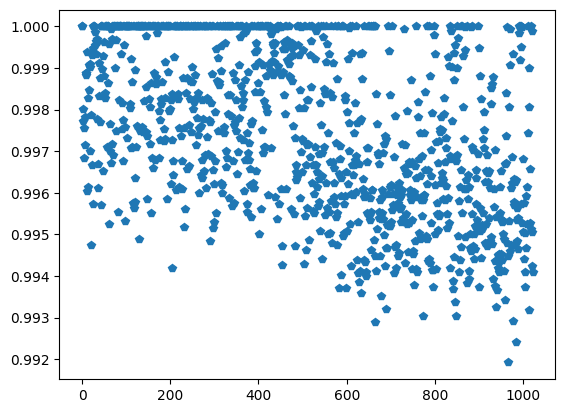

In [14]:
plt.plot(range(len(proportions_in_times)), [prop[0] for prop in proportions_in_times], 'p')

In [15]:
prop = [prop[0] for prop in proportions_in_times]

In [16]:
with open('../results/sacharose_1000/comparing_with_first/unknown_substrats/proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'wb') as f:
    pickle.dump(prop, f)

In [17]:
with open('../results/sacharose_1000/comparing_with_first/unknown_substrats/noise_proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'wb') as f:
    pickle.dump(noise_proportions_in_times, f)

### Linear regression

In [10]:
with open(r'../results/sacharose_1000/comparing_with_first/unknown_substrats/proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'rb') as f:
    y = pickle.load(f)
    y = np.array(y).reshape(-1,1)

In [11]:
t = np.array(range(1,1024))

In [12]:
t_and_ones = np.vstack([t, np.ones(len(t))]).T

In [13]:
slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]

/tmp/ipykernel_16353/1288480160.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]


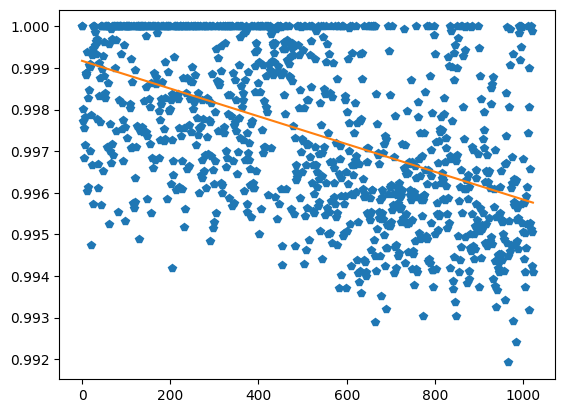

In [14]:
plt.plot(range(len(y)), [prop[0] for prop in y], 'p')
plt.plot(slope*t+intercept)